In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('age_salary.csv')
df

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,NaN
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,NaN,21.0
5,5,Russia,No,45000.0,NaN
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
8,8,Russia,Yes,NaN,45.0
9,9,Germany,Yes,67222.0,53.0


In [5]:
# dropping the index column as not required

df.drop('index',axis=1,inplace=True)

In [6]:
#lets check the null value

df.isnull().sum()

Nation            0
purchased_item    0
salary            2
age               2
dtype: int64

In [7]:
# replacing all nan values


from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
df['salary']=imp.fit_transform(df['salary'].values.reshape(-1,1))
df['age']=imp.fit_transform(df['age'].values.reshape(-1,1))


In [8]:
# encoding all to numeric values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Nation','purchased_item']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

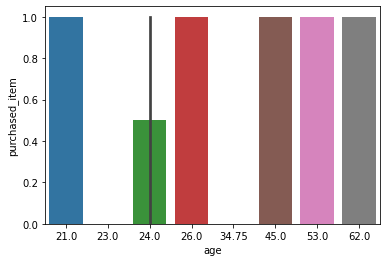

In [9]:
sns.barplot(x=df['age'],y=df['purchased_item'],data=df)
plt.show()

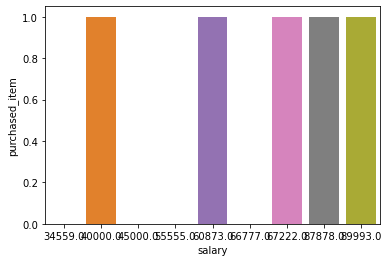

In [10]:
sns.barplot(x=df['salary'],y=df['purchased_item'],data=df)
plt.show()

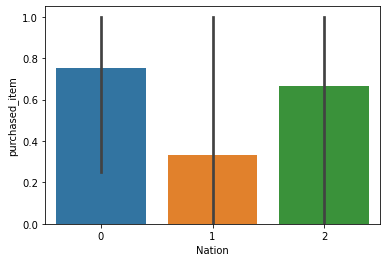

In [11]:
sns.barplot(x=df['Nation'],y=df['purchased_item'],data=df)
plt.show()

In [12]:
df.describe()

,Nation,purchased_item,salary,age
count,10.000000,10.000000,10.000000,10.000000
mean,0.900000,0.600000,60873.000000,34.750000
std,0.875595,0.516398,18441.358771,14.202895
min,0.000000,0.000000,34559.000000,21.000000
25%,0.000000,0.000000,47638.750000,24.000000
50%,1.000000,1.000000,60873.000000,30.375000
75%,1.750000,1.000000,67110.750000,42.437500
max,2.000000,1.000000,89993.000000,62.000000


In [13]:
df.skew()

Nation            0.223451
purchased_item   -0.484123
salary            0.296409
age               0.970209
dtype: float64

In [14]:
# treating skewness using log

for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [15]:
df.skew()  # checking again

Nation            0.223451
purchased_item   -0.484123
salary            0.296409
age               0.599433
dtype: float64

In [16]:
df.corr()

,Nation,purchased_item,salary,age
Nation,1.000000,-0.098295,0.013604,-0.226841
purchased_item,-0.098295,1.000000,0.485382,0.287658
salary,0.013604,0.485382,1.000000,0.241158
age,-0.226841,0.287658,0.241158,1.000000


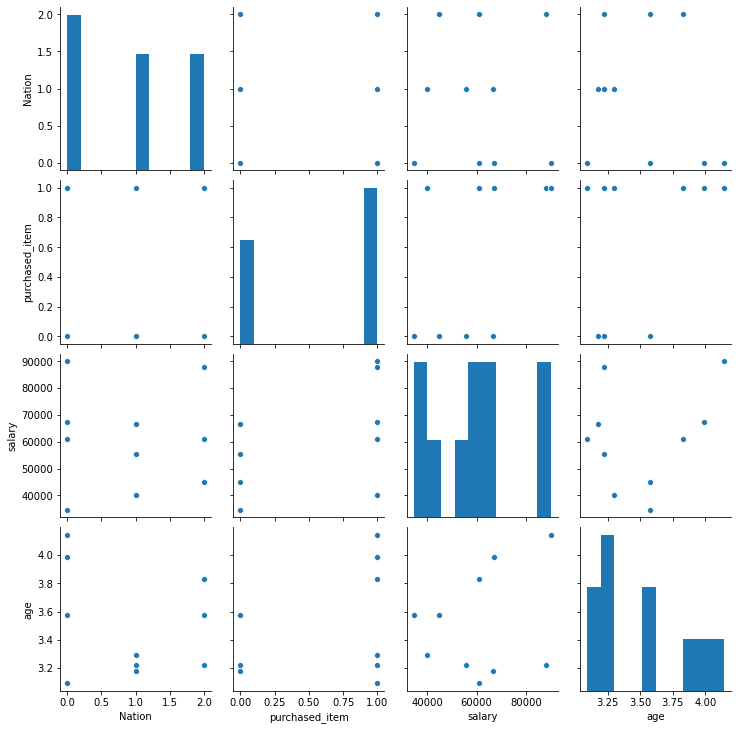

In [17]:
sns.pairplot(df)
plt.show()

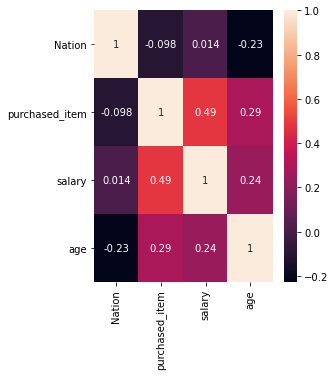

In [18]:
# heatmap
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(4,5))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Nation             AxesSubplot(0.125,0.71587;0.775x0.16413)
purchased_item    AxesSubplot(0.125,0.518913;0.775x0.16413)
salary            AxesSubplot(0.125,0.321957;0.775x0.16413)
age                  AxesSubplot(0.125,0.125;0.775x0.16413)
dtype: object

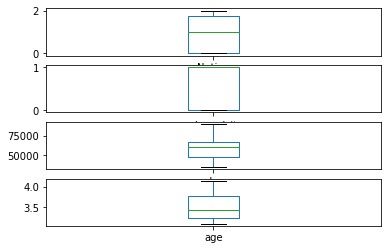

In [19]:
# checking outliers

df.plot.box(subplots=True,layout=(4,1))

In [20]:
#splitting the data for training and test

x=df.drop(columns=['purchased_item'])
y=df['purchased_item']

In [21]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.12038585,  0.33746767, -0.9467006 ],
       [ 1.32424438,  1.54358308, -0.8308549 ],
       [-1.08347268, -1.5040861 ,  0.18416272],
       [ 0.12038585, -1.19308312, -0.61245291],
       [-1.08347268,  0.        , -1.19362369],
       [ 1.32424438, -0.90728733,  0.18416272],
       [-1.08347268,  1.6644747 ,  1.79203048],
       [ 0.12038585, -0.30397241, -0.8308549 ],
       [ 1.32424438,  0.        ,  0.89955332],
       [-1.08347268,  0.3629035 ,  1.35457777]])

In [22]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>max_score:
        max_score=score
        final_r_state=r_state
print("Maximimum Accuracy Score is",max_score,'at',final_r_state)

Maximimum Accuracy Score is 1.0 at 79


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=79)

In [25]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)

In [26]:
print('Accuracy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))
print('classification report:',classification_report(y_test,pred))

Accuracy score: 1.0
confusion matrix: [[1 0]
 [0 2]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [28]:
# cross validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(lg,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.5 0.5 0.  0.5 0.5]
0.4 0.2


In [29]:
# saving the model

import joblib
joblib.dump(lg,'lgfile_salary.obj') 

['lgfile_salary.obj']